In [67]:
import pandas as pd
file_path = 'property_information.csv'
df = pd.read_csv(file_path)

In [81]:
df1 = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*df.isnull().sum()[df.isnull().sum()>0]/len(df)),2)
df1

,Number of Missing values,% of Missing Values
short_address,732,0.70
full_address,732,0.70
bedrooms,1712,1.63
bathrooms,1712,1.63
parking_spaces,1712,1.63
building_size,101561,96.88
building_size_unit,101561,96.88
land_size_unit,54080,51.59
auction_date,104833,100.00
available_date,104833,100.00


In [69]:
df = df.dropna(subset=['price']).reset_index(drop=True)

In [70]:
df_1 = df[df['suburb']=='Clayton'].reset_index(drop=True)
df_1 = df_1[['suburb','bedrooms','bathrooms','parking_spaces']]
df_1

,suburb,bedrooms,bathrooms,parking_spaces
0,Clayton,3.0,3.0,2.0
1,Clayton,2.0,1.0,1.0
2,Clayton,4.0,2.0,1.0
3,Clayton,4.0,3.0,2.0
4,Clayton,2.0,2.0,1.0
...,...,...,...,...
2553,Clayton,3.0,2.0,0.0
2554,Clayton,2.0,1.0,0.0
2555,Clayton,4.0,2.0,2.0
2556,Clayton,6.0,2.0,1.0


In [78]:
df_2 = df[df['land_size']>0].reset_index(drop=True)
df_2 = df_2[['suburb','land_size','land_size_unit']]
df_2['land_size'] = df_2.apply(lambda x: x['land_size']*10000 if x['land_size_unit']=='ha' else x['land_size'], axis=1)

In [80]:
avg_land_size = df_2['land_size'].mean().round(4)
avg_land_size

640.4535

In [101]:
df = pd.read_csv(file_path)

In [102]:
import matplotlib.pyplot as plt
import numpy as np
target_currency = "AUD"

df_4 = df.dropna(subset=['price']).reset_index(drop=True)

currency_dict = {"AUD": 1, "USD": 0.66, "INR": 54.25, "CNY":
4.72, "JPY": 93.87, "HKD": 5.12, "KRW": 860.92, "GBP": 0.51,
"EUR": 0.60, "SGD": 0.88}

currency = currency_dict[target_currency]
df_4['price'] = df_4['price'] * currency

data = np.array(df_4['price'])


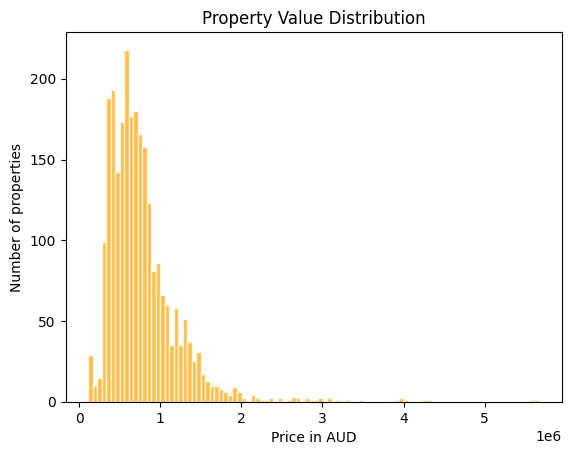

In [118]:
# 将数据分成100个区间
bins = np.linspace(min(data), max(data), num=101)

# 绘制直方图
plt.hist(data, bins=bins, alpha=0.7, color='orange', edgecolor='white')

# 设置图形标题和轴标签
plt.title('Property Value Distribution')
plt.xlabel('Price in ' + target_currency)
plt.ylabel('Number of properties')

# 保存图形
plt.show()

# 保存图形
plt.savefig('property_value_distribution.png')

In [135]:
df = pd.read_csv(file_path)
df.head()

,id,badge,suburb,state,postcode,short_address,full_address,property_type,price,price_text,bedrooms,bathrooms,parking_spaces,building_size,building_size_unit,land_size,land_size_unit,auction_date,available_date,sold_date
0,141922512,Sold,Clayton,Vic,3168,5/58-60 Prince Charles Street,"5/58-60 Prince Charles Street, Clayton, Vic 3168",townhouse,965000.0,"$965,000",3.0,3.0,2.0,NaN,NaN,-1.0,NaN,NaN,NaN,3/4/2023
1,141599568,Sold,Clayton,Vic,3168,14/1 Greenfield Drive,"14/1 Greenfield Drive, Clayton, Vic 3168",apartment,405000.0,"$405,000",2.0,1.0,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,3/4/2023
2,141574624,Sold,Clayton,Vic,3168,1/11 Beddoe Avenue,"1/11 Beddoe Avenue, Clayton, Vic 3168",unit,881000.0,"$881,000",4.0,2.0,1.0,NaN,NaN,307.0,m²,NaN,NaN,1/4/2023
3,141840188,Sold,Clayton,Vic,3168,97 Harlington Street,"97 Harlington Street, Clayton, Vic 3168",townhouse,1070000.0,"$1,070,000",4.0,3.0,2.0,NaN,NaN,-1.0,NaN,NaN,NaN,29/3/2023
4,141462600,Sold,Clayton,Vic,3168,B202/29 Browns Road,"B202/29 Browns Road, Clayton, Vic 3168",apartment,500000.0,"$500,000",2.0,2.0,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,29/3/2023


In [136]:
df = df.dropna(subset=['sold_date']).reset_index(drop=True)

In [137]:
df['sold_date'] = pd.to_datetime(df['sold_date'])
df['sold_year'] = df['sold_date'].dt.year
# calculate the number of properties sold in each year and visualise the results as a line chart
df_group_year = df.groupby('sold_year').count()['id'].to_frame().rename(columns={'id':'number_of_properties_sold'})
df_group_year.reset_index(inplace=True)

In [142]:
df_group_year

,sold_year,number_of_properties_sold
0,2010,5154
1,2011,4902
2,2012,5588
3,2013,7487
4,2014,9389
5,2015,10454
6,2016,9562
7,2017,10259
8,2018,8658
9,2019,9629


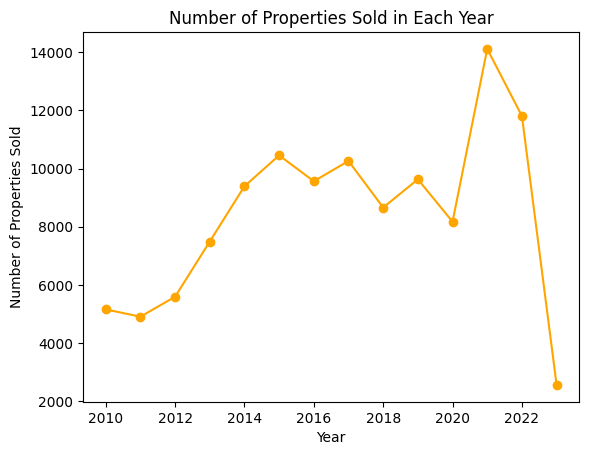

In [141]:
df_group_year
# 生成折线图
plt.plot(df_group_year['sold_year'], df_group_year['number_of_properties_sold'], color='orange', marker='o')
plt.title('Number of Properties Sold in Each Year')
plt.xlabel('Year')
plt.ylabel('Number')
plt.show()

# 保存图形
plt.savefig('number_of_properties_sold.png')

In [48]:
from handle_data import LoadData
import pandas as pd
file_path = 'property_information.csv'
data = pd.read_csv(file_path)

target_suburb = 'Clayton'

df = data[data['suburb']==target_suburb].reset_index(drop=True)
price_list = df['price'].tolist()

In [49]:
price_list

[965000.0,
 405000.0,
 881000.0,
 1070000.0,
 500000.0,
 535000.0,
 781000.0,
 895000.0,
 705000.0,
 680000.0,
 670000.0,
 982000.0,
 970000.0,
 1502000.0,
 1430000.0,
 951000.0,
 770000.0,
 350000.0,
 650000.0,
 1080000.0,
 380000.0,
 792000.0,
 1268000.0,
 415000.0,
 363000.0,
 1196000.0,
 980000.0,
 290000.0,
 1635000.0,
 370000.0,
 339000.0,
 1603000.0,
 935000.0,
 795000.0,
 1150000.0,
 1210000.0,
 964500.0,
 550000.0,
 1439000.0,
 900000.0,
 410000.0,
 638288.0,
 636000.0,
 358000.0,
 550000.0,
 570000.0,
 445000.0,
 835000.0,
 1470000.0,
 990000.0,
 950000.0,
 900000.0,
 775000.0,
 745000.0,
 525000.0,
 420000.0,
 872000.0,
 738000.0,
 735000.0,
 382000.0,
 551000.0,
 917000.0,
 836000.0,
 820000.0,
 900000.0,
 920000.0,
 818000.0,
 781000.0,
 650500.0,
 1295000.0,
 560000.0,
 1315000.0,
 1388888.0,
 643000.0,
 1220000.0,
 1111000.0,
 1240000.0,
 728000.0,
 590000.0,
 555000.0,
 880000.0,
 1150000.0,
 680000.0,
 567500.0,
 1110000.0,
 1315000.0,
 1100000.0,
 785500.0,
 481000.0,

In [2]:
suburb = 'clayton'
question = 'Do you want to see the distribution of '+ suburb +'(Y/N)?'
print(question)

Do you want to see the distribution of clayton(Y/N)?
